In [20]:
import pandas as pd 
import os
import json
import torch 
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("Using", device, "device")
import torch
import spacy

print(torch.__version__)
print(spacy.__version__)

spacy.require_gpu() # require_gpu raises an error if no GPU is avail 
nlp = spacy.load("en_core_web_md")
import matplotlib.pyplot as plt


Using cuda device
1.13.0+cu116
3.7.4


## Using SpaCy tokenizer for english, for sentence length binning

In [21]:
def tokenize_en(str_):
    return(len(nlp.tokenizer(str_)))

## Get Data
Reading in data from one of my prev csv files

In [27]:
train_df = pd.read_csv(r"train data\train_en_zh.csv")
train_df

,en,zh
0,"Several years ago here at TED, Peter Skillman ...",几年前，在TED大会上， Peter Skillman 介绍了一个设计挑战 叫做“棉花糖挑战”
1,And the idea's pretty simple: Teams of four h...,是个非常简单的主意 要求一组四人的团队搭建一个独立的最高建筑 材料是20根意大利面条 一段胶...
2,The marshmallow has to be on top.,棉花糖必须放在最上面
3,"And, though it seems really simple, it's actua...",这虽然看似简单，其实并不容易 因为它要求人们 迅速地合作
4,"And so, I thought this was an interesting idea...",我觉得这是个有趣的主意 我把它放到了设计专题讨论会上
...,...,...
8544,"And the answer is, the ability to seek goals ...",答案是，寻找目标的能力 将直接遵循它， 道理是这样的： 就像你要穿过一条隧道， 你未来道路空...
8545,from a long-term drive to increase future fre...,长期的驱动， 为了增加未来的行动自由。
8546,"Finally, Richard Feynman, famous physicist, o...",最后，理查德 · 费曼， 这位著名的物理学家， 曾经写道， 如果人类文明被摧毁 并且你只能将...
8547,My equivalent of that statement to pass on to...,我与这句话等同的声明， 来传递给后代， 帮助他们建立人工智能 或是帮助他们理解 人类的智慧，...


## Point to your indiv scores json

In [28]:

#files = os.listdir('.')
json_file_rnn = [r"C:\Users\user\OneDrive\Documents\GitHub\cs4248-neural-translation\evaluations\individual_scores\230k-base-lstm.json"]
json_objects = []
counter = 0

for json_file in json_file_rnn:
    counter += 1
    print(f"{json_file[:-5]} : {counter}") 

    with open(json_file, 'r') as file:
        json_objects.append(json.load(file))

assert len(json_objects[0]['BLEU']) == len(json_objects[0]['BERTSCORE_F1']) == len(json_objects[0]['BERTSCORE_P']) == len(json_objects[0]['BERTSCORE_R']) == len(train_df), "lengths do not tally"



C:\Users\user\OneDrive\Documents\GitHub\cs4248-neural-translation\evaluations\individual_scores\230k-base-lstm : 1


## Prepare & save df for plot

In [29]:
train_df['BLEU'] = json_objects[0]['BLEU']
train_df['BERTSCORE_F1'] = json_objects[0]['BERTSCORE_F1']
train_df['BERTSCORE_P'] = json_objects[0]['BERTSCORE_P']
train_df['BERTSCORE_R'] = json_objects[0]['BERTSCORE_R']
train_df['EN_LEN'] = train_df['en'].apply(tokenize_en)

# name is up to you, this is j temp s
train_df.to_csv(r"score by sentence len\230k-yourmodel-4-plot.csv",index=False)

## General plot

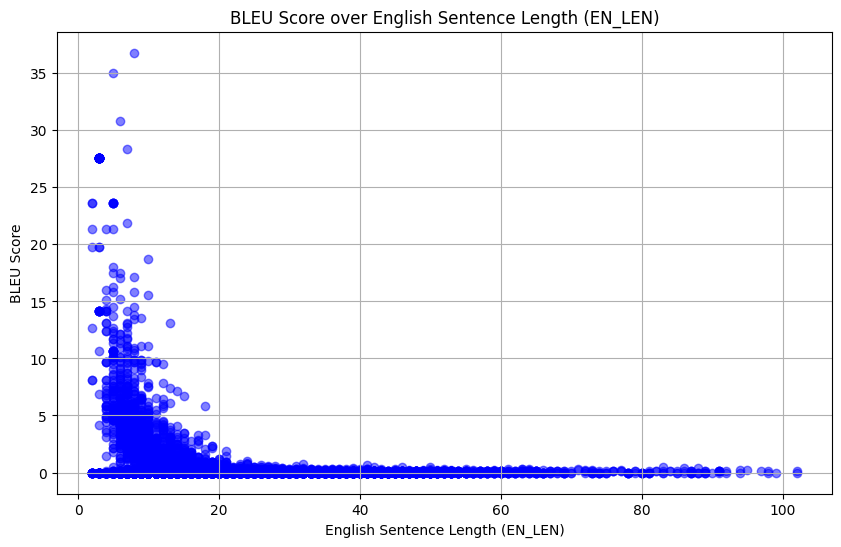

In [30]:
# Plotting BLEU scores over EN_LEN
plt.figure(figsize=(10, 6))
plt.scatter(train_df['EN_LEN'], train_df['BLEU'], color='blue', alpha=0.5)
plt.title('BLEU Score over English Sentence Length (EN_LEN)')
plt.xlabel('English Sentence Length (EN_LEN)')
plt.ylabel('BLEU Score')
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9116\670176096.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bleu_per_category = train_df.groupby('Length Category')['BLEU'].mean()


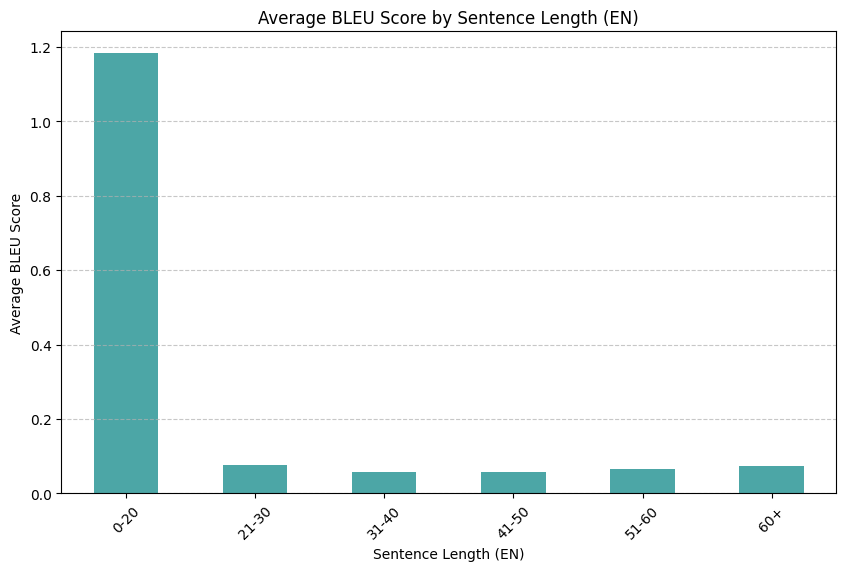

In [31]:
# Define the bins 
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

# sent len to bins
train_df['Length Category'] = pd.cut(train_df['EN_LEN'], bins=bins, labels=labels, right=False)

# avg BLEU score for each bin
average_bleu_per_category = train_df.groupby('Length Category')['BLEU'].mean()

# avg BLEU scores for each bin
plt.figure(figsize=(10, 6))
average_bleu_per_category.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Average BLEU Score by Sentence Length (EN)')
plt.xlabel('Sentence Length (EN)')
plt.ylabel('Average BLEU Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## RNN vs Transformers vs LSTM

C:\Users\user\AppData\Local\Temp\ipykernel_9116\1343994833.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bleu_rnn = rnn_data.groupby('Length Category')['BLEU'].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_9116\1343994833.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bleu_transformer = transformer_data.groupby('Length Category')['BLEU'].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_9116\1343994833.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or ob

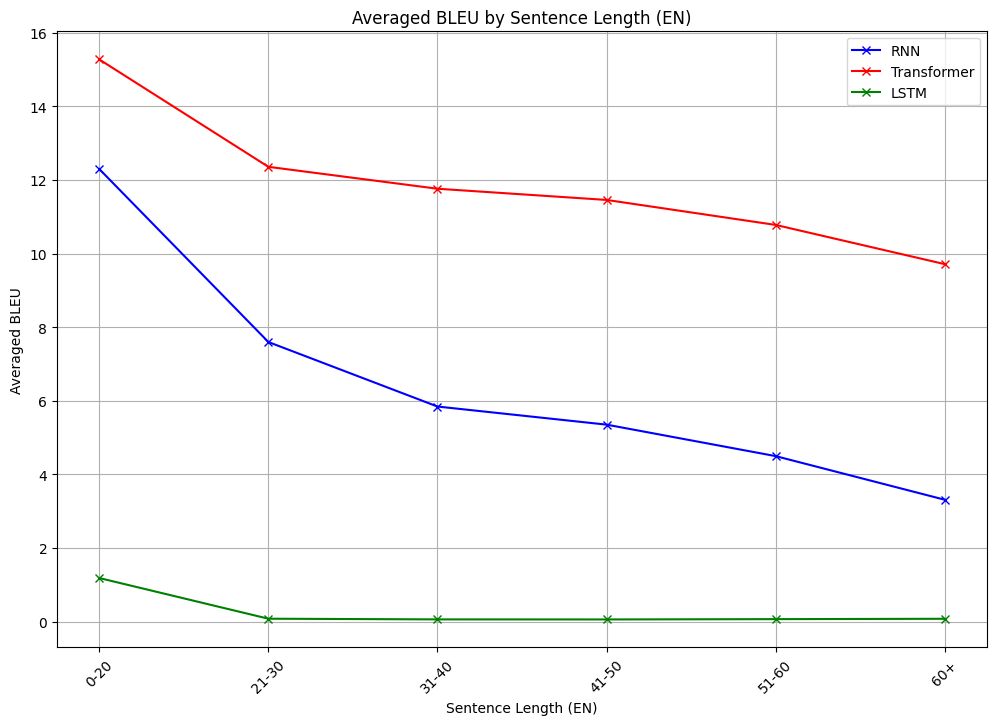

In [34]:
# Load the CSV files for both RNN and Transformer models
transformer_data_path = r'score by sentence len\230k-trnf-4-plot.csv'
rnn_data_path= r'score by sentence len\230k-rnn-4-plot.csv'
lstm_data_path= r'score by sentence len\230k-lstm-4-plot.csv'

rnn_data = pd.read_csv(rnn_data_path)
transformer_data = pd.read_csv(transformer_data_path)
lstm_data = pd.read_csv(lstm_data_path)

# repeated
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

rnn_data['Length Category'] = pd.cut(rnn_data['EN_LEN'], bins=bins, labels=labels, right=False)
transformer_data['Length Category'] = pd.cut(transformer_data['EN_LEN'], bins=bins, labels=labels, right=False)
lstm_data['Length Category'] = pd.cut(lstm_data['EN_LEN'], bins=bins, labels=labels, right=False)

average_bleu_rnn = rnn_data.groupby('Length Category')['BLEU'].mean()
average_bleu_transformer = transformer_data.groupby('Length Category')['BLEU'].mean()
average_bleu_lstm = lstm_data.groupby('Length Category')['BLEU'].mean()


# Plotting the average BLEU scores for each sentence length category for both models
plt.figure(figsize=(12, 8))
plt.plot(average_bleu_rnn, label='RNN', marker='x', color='blue')
plt.plot(average_bleu_transformer, label='Transformer', marker='x', color='red')
plt.plot(average_bleu_lstm, label='LSTM', marker='x', color='green')
plt.title('Averaged BLEU by Sentence Length (EN)')
plt.xlabel('Sentence Length (EN)')
plt.ylabel('Averaged BLEU')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()



## Double check Bleu

In [19]:
from sacrebleu.metrics import BLEU, CHRF, TER
refs = [
         ['非常感谢。']
       ]
sys = ['谢 谢 。 。 。']

for i in range(1,5):
  print(f"{i}. BLEU-{i}")
  bleu = BLEU(smooth_method='exp', tokenize='zh', max_ngram_order=i)
  print(bleu.corpus_score(sys, refs))
  print(50*'-')


1. BLEU-1
BLEU = 40.00 40.0 (BP = 1.000 ratio = 1.000 hyp_len = 5 ref_len = 5)
--------------------------------------------------
2. BLEU-2
BLEU = 31.62 40.0/25.0 (BP = 1.000 ratio = 1.000 hyp_len = 5 ref_len = 5)
--------------------------------------------------
3. BLEU-3
BLEU = 25.54 40.0/25.0/16.7 (BP = 1.000 ratio = 1.000 hyp_len = 5 ref_len = 5)
--------------------------------------------------
4. BLEU-4
BLEU = 21.36 40.0/25.0/16.7/12.5 (BP = 1.000 ratio = 1.000 hyp_len = 5 ref_len = 5)
--------------------------------------------------
